<a href="https://colab.research.google.com/github/RuchikaSuryawanshi7/Digit-Detector/blob/master/RuchikaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import keras

Using TensorFlow backend.


In [5]:
from keras.datasets import mnist

In [6]:
data = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [7]:
(train_images, train_labels),(test_images, test_labels) = data

In [8]:
len(train_images)

60000

In [9]:
len(train_labels)

60000

In [10]:
len(test_images)

10000

In [11]:
len(test_labels)

10000

In [12]:
#60000 coz of its len ,28 is the dimension,1 coz it is  not a RGB image it is a grey scale img
train_images = train_images.reshape((60000,28,28,1))

In [13]:
test_images = test_images.reshape((10000,28,28,1))

In [14]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [15]:
train_images = train_images.astype("float")/255    #normalization

In [16]:
test_images = test_images.astype("float")/255   #normalization 

In [17]:
from keras.preprocessing import image

In [18]:
import matplotlib.pyplot as plt


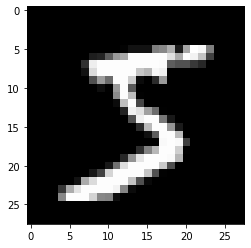

In [19]:
plt.imshow(image.array_to_img(train_images[0]),cmap = "gray")

In [20]:
train_labels[0]

5

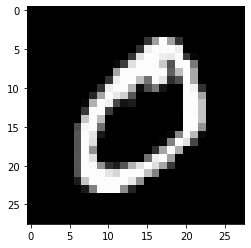

In [21]:
plt.imshow(image.array_to_img(train_images[1]),cmap = "gray")

In [22]:
train_labels[1]

0

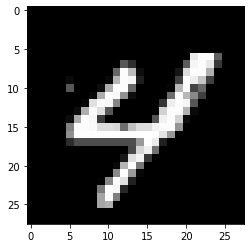

In [23]:
plt.imshow(image.array_to_img(train_images[89]),cmap = "gray")

In [24]:
train_labels[89]

4

In [25]:
from keras.utils import to_categorical

In [26]:
train_labels_original = train_labels

In [27]:
train_labels = to_categorical(train_labels)

In [28]:
train_labels_original[1]

0

In [29]:
train_labels[77]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
test_labels_original = test_labels

In [31]:
test_labels = to_categorical(test_labels)

In [32]:
from keras import layers, models

In [33]:
model = models.Sequential()

In [34]:
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape = (28,28,1)))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.add(layers.MaxPooling2D((2,2)))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.add(layers.Conv2D(64, (3,3), activation= "relu"))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.add(layers.MaxPool2D((2,2)))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [43]:
model.add(layers.Flatten())

In [44]:
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [46]:
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics=["accuracy"])

In [47]:
model.fit(train_images,train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.1794 - accuracy: 0.9446
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0489 - accuracy: 0.9844
Epoch 3/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0336 - accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0261 - accuracy: 0.9918
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0199 - accuracy: 0.9937
Epoch 6/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0158 - accuracy: 0.9952
Epoch 7/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0132 - accuracy: 0.9959
Epoch 8/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0106 - accuracy: 0.9968
Epoch 9/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0095 - accuracy: 0.9970
Epoch 10/10
60000/60000 [====================

In [48]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 124us/step


In [49]:
test_accuracy

0.9925000071525574

In [50]:
predictions = model.predict_classes(test_images)

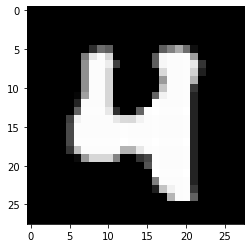

In [51]:
plt.imshow(image.array_to_img(test_images[736]), cmap = "gray")

In [52]:
predictions[736]

4

In [53]:
img = image.load_img(path="zero.jpg",grayscale=True,target_size=(28,28,1))



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [54]:
img = image.img_to_array(img)
test_img = img.reshape((1,28,28,1))
test_img = test_img.astype("float")/255    #normalization
img_class = model.predict_classes(test_img)
prediction = img_class[0]

In [55]:
test_img = img.reshape((1,28,28,1))


In [57]:
prediction

6